In [2]:
!pip install auto-sklearn


  Using cached auto-sklearn-0.15.0.tar.gz (6.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks

In [1]:
!pip install medmnist


In [1]:
!pip install tensorflow 


  Using cached absl_py-2.2.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached h5py-3.13.0-cp310-cp310-macosx_11_0_arm64.whl.metadata 

In [3]:
from tqdm import tqdm
import numpy as np

import medmnist
from medmnist import INFO, Evaluator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [4]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")


MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/


In [4]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")


MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/


In [70]:
# Set dataset and parameters
from medmnist import PathMNIST

# Load PathMNIST dataset
data_flag = "pathmnist"  # Change this for different MedMNIST datasets
info = INFO[data_flag]
DataClass = getattr(medmnist, info["python_class"])

# Download dataset
train_dataset = DataClass(split="train", download=True)
test_dataset = DataClass(split="test", download=True)

# Get data and labels
x_train, y_train = train_dataset.imgs, train_dataset.labels
x_test, y_test = test_dataset.imgs, test_dataset.labels

# Print dataset information
print(f"Dataset: {data_flag}")
print(f"Training samples: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test samples: {x_test.shape}, Labels: {y_test.shape}")


Dataset: pathmnist
Training samples: (89996, 28, 28, 3), Labels: (89996, 1)
Test samples: (7180, 28, 28, 3), Labels: (7180, 1)


In [6]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(89996, 28, 28, 3) (89996, 1) (7180, 28, 28, 3) (7180, 1)


In [7]:
# printing the 10th image

print(x_train[10])

[[[171 106 158]
  [182 120 169]
  [178 116 167]
  ...
  [199 144 187]
  [203 151 191]
  [204 146 189]]

 [[137  69 128]
  [150  85 142]
  [159  99 154]
  ...
  [191 134 180]
  [195 136 182]
  [200 147 189]]

 [[155  91 148]
  [150  84 141]
  [161  98 153]
  ...
  [162 103 155]
  [178 119 168]
  [192 137 182]]

 ...

 [[177 117 167]
  [195 134 180]
  [200 140 185]
  ...
  [201 139 183]
  [211 164 199]
  [202 143 186]]

 [[202 141 186]
  [197 136 183]
  [195 139 183]
  ...
  [181 117 168]
  [214 160 198]
  [219 173 207]]

 [[205 144 187]
  [172 111 162]
  [167 117 164]
  ...
  [173 112 164]
  [200 139 185]
  [208 146 189]]]


In [8]:
print(x_train[10].shape)

(28, 28, 3)


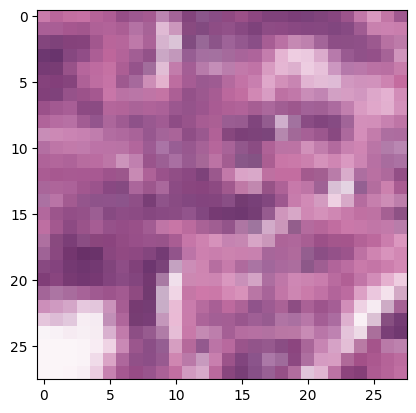

[8]


In [ ]:
# displaying the image

plt.imshow(x_train[25])
plt.show()

# print the corresponding label
print(y_train[25])

In [10]:
print(y_train.shape, y_test.shape)

(89996, 1) (7180, 1)


### Classes in  Pathmnist= 9

In [12]:
# unique values in Y_train
print(np.unique(y_train))

# unique values in Y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8]


In [71]:
# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Reshape images for TensorFlow
x_train = x_train.reshape(-1, 28, 28, 3)  # (batch, height, width, channels)
x_test = x_test.reshape(-1, 28, 28, 3)


In [72]:
print(x_train[10])

[[[0.67058824 0.41568627 0.61960784]
  [0.71372549 0.47058824 0.6627451 ]
  [0.69803922 0.45490196 0.65490196]
  ...
  [0.78039216 0.56470588 0.73333333]
  [0.79607843 0.59215686 0.74901961]
  [0.8        0.57254902 0.74117647]]

 [[0.5372549  0.27058824 0.50196078]
  [0.58823529 0.33333333 0.55686275]
  [0.62352941 0.38823529 0.60392157]
  ...
  [0.74901961 0.5254902  0.70588235]
  [0.76470588 0.53333333 0.71372549]
  [0.78431373 0.57647059 0.74117647]]

 [[0.60784314 0.35686275 0.58039216]
  [0.58823529 0.32941176 0.55294118]
  [0.63137255 0.38431373 0.6       ]
  ...
  [0.63529412 0.40392157 0.60784314]
  [0.69803922 0.46666667 0.65882353]
  [0.75294118 0.5372549  0.71372549]]

 ...

 [[0.69411765 0.45882353 0.65490196]
  [0.76470588 0.5254902  0.70588235]
  [0.78431373 0.54901961 0.7254902 ]
  ...
  [0.78823529 0.54509804 0.71764706]
  [0.82745098 0.64313725 0.78039216]
  [0.79215686 0.56078431 0.72941176]]

 [[0.79215686 0.55294118 0.72941176]
  [0.77254902 0.53333333 0.71764706]


Epoch 1/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.4907 - loss: 1.3428 - val_accuracy: 0.7357 - val_loss: 0.7773
Epoch 2/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7286 - loss: 0.7352 - val_accuracy: 0.7315 - val_loss: 1.0192
Epoch 3/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7720 - loss: 0.6236 - val_accuracy: 0.7428 - val_loss: 0.9130
Epoch 4/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8061 - loss: 0.5295 - val_accuracy: 0.7886 - val_loss: 0.6352
Epoch 5/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8238 - loss: 0.4799 - val_accuracy: 0.8063 - val_loss: 0.8762
Epoch 6/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.8443 - loss: 0.4282 - val_accuracy: 0.8092 - val_loss: 0.5946
Epoch 7/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8532 - loss: 0.4011 - val_accuracy: 0.7983 - val_loss: 0.6900
Epoch 8/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8646 - loss: 0

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,981 (2.77 MB)

 Trainable params: 241,993 (945.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,988 (1.85 MB)

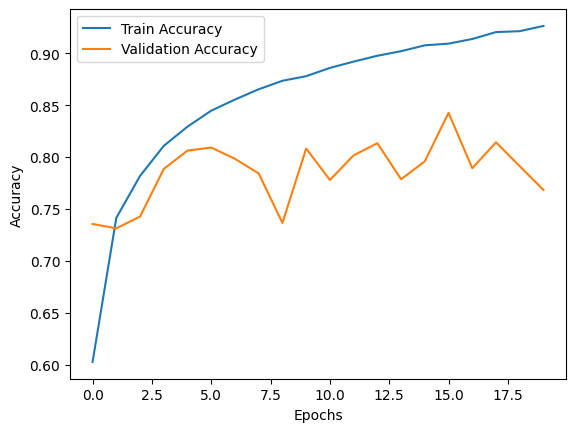

In [ ]:
# Create a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=13, validation_data=(x_test, y_test), batch_size=32)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Show model summary
model.summary()

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.4694 - loss: 1.3971 - val_accuracy: 0.6799 - val_loss: 0.8459
Epoch 2/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7119 - loss: 0.7868 - val_accuracy: 0.7472 - val_loss: 0.7307
Epoch 3/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7624 - loss: 0.6540 - val_accuracy: 0.7561 - val_loss: 0.7152
Epoch 4/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7944 - loss: 0.5589 - val_accuracy: 0.7394 - val_loss: 0.8416
Epoch 5/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8133 - loss: 0.5128 - val_accuracy: 0.7389 - val_loss: 0.7542
Epoch 6/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8339 - loss: 0.4575 - val_accuracy: 0.7680 - val_loss: 0.7020
Epoch 7/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8460 - loss: 0.4191 - val_accuracy: 0.7610 - val_loss: 0.8077
Epoch 8/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8589 - loss: 0

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,981 (2.77 MB)

 Trainable params: 241,993 (945.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,988 (1.85 MB)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Model Size: 0.9231 MB


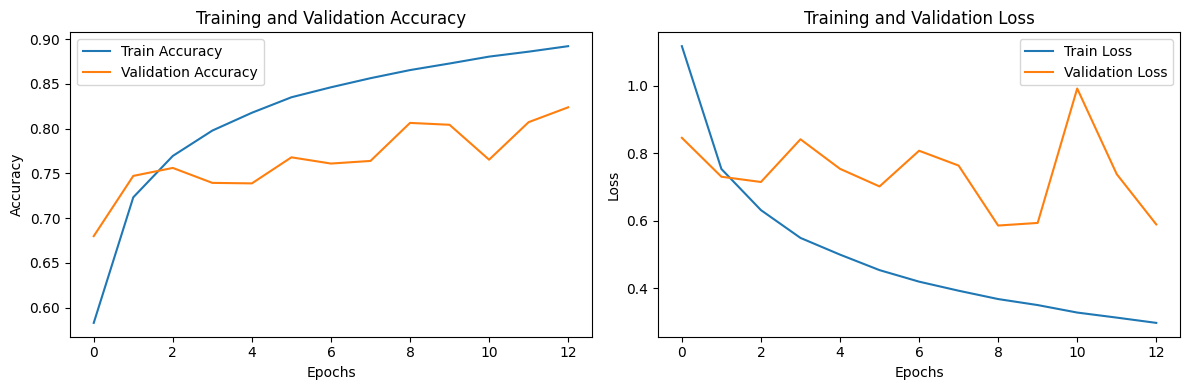

            Metric     Value
0         Accuracy  0.823816
1        Precision  0.786469
2           Recall  0.783936
3         F1 Score  0.768403
4          AUC-ROC  0.976847
5  Model Size (MB)  0.923130


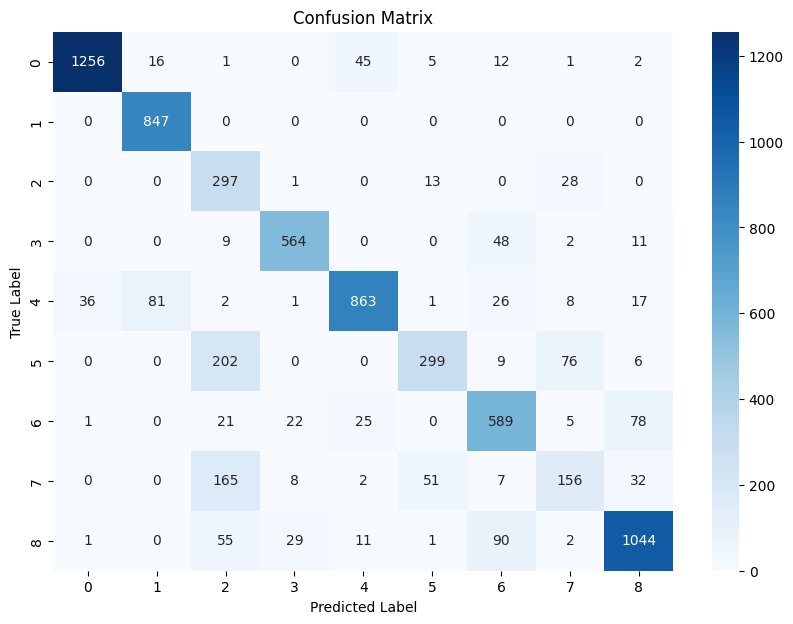

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from medmnist import PathMNIST, INFO
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import pandas as pd

# Load PathMNIST dataset
data_flag = "pathmnist"
info = INFO[data_flag]
DataClass = getattr(medmnist, info["python_class"])

# Download dataset
train_dataset = DataClass(split="train", download=True)
test_dataset = DataClass(split="test", download=True)

# Get data and labels
x_train, y_train = train_dataset.imgs, train_dataset.labels
x_test, y_test = test_dataset.imgs, test_dataset.labels

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train.flatten(), num_classes)
y_test = keras.utils.to_categorical(y_test.flatten(), num_classes)

# Reshape images for TensorFlow
x_train = x_train.reshape(-1, 28, 28, 3)
x_test = x_test.reshape(-1, 28, 28, 3)

# Create a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=13, validation_data=(x_test, y_test), batch_size=32)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Show model summary
model.summary()

# Calculate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Calculate AUC-ROC
# For AUC-ROC, we need to use the probabilities of the positive class
y_pred_prob = model.predict(x_test)
auc_roc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Model size
model_size_mb = model.count_params() * 4 / (1024 * 1024)  # Assuming 4 bytes per parameter
print(f"Model Size: {model_size_mb:.4f} MB")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Create a results table
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'Model Size (MB)'],
    'Value': [test_acc, precision, recall, f1, auc_roc, model_size_mb]
})

print(results)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [41]:
pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl (37.3 MB)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [74]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

# Generate Grad-CAM
def generate_grad_cam(model, image, class_index, layer_name='conv2d_48'):
    """
    Generate Grad-CAM heatmap.
    :param model: The trained model
    :param image: The image to explain
    :param class_index: The predicted class index
    :param layer_name: The layer name to use for Grad-CAM (usually the last convolutional layer)
    :return: Heatmap of the Grad-CAM result
    """
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs], 
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        inputs = tf.convert_to_tensor(image.reshape(1, 28, 28, 3))
        tape.watch(inputs)
        conv_outputs, predictions = grad_model(inputs)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply the feature maps by the pooled gradients
    conv_outputs = conv_outputs[0]
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Create the heatmap
    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

# Select an image from the test set to visualize
test_image = x_test[0]  # First image in the test set
pred_class_index = np.argmax(y_pred[0])  # Predicted class index for the selected image

# Generate Grad-CAM heatmap
grad_cam_heatmap = generate_grad_cam(model, test_image, pred_class_index, layer_name='conv2d_48')

# Plot the image and the heatmap
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title(f"Original Image (Predicted: {pred_class_index})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(test_image)
plt.imshow(grad_cam_heatmap, cmap='jet', alpha=0.6)  # Overlay heatmap on image
plt.title('Grad-CAM Heatmap')
plt.axis('off')

plt.tight_layout()
plt.show()

# Explain the model using SHAP
explainer = shap.KernelExplainer(model.predict, x_train[:100])  # Use a subset of x_train for the background
shap_values = explainer.shap_values(x_test[:10])  # Explain first 10 test images

# Plot SHAP values for the first image
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], x_test[0])


AttributeError: The layer sequential_16 has never been called and thus has no defined output.

Epoch 1/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.4555 - loss: 1.4186 - val_accuracy: 0.7072 - val_loss: 0.8746
Epoch 2/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7189 - loss: 0.7628 - val_accuracy: 0.7591 - val_loss: 0.6983
Epoch 3/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7623 - loss: 0.6504 - val_accuracy: 0.7322 - val_loss: 0.8336
Epoch 4/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7874 - loss: 0.5779 - val_accuracy: 0.7006 - val_loss: 1.0782
Epoch 5/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8063 - loss: 0.5295 - val_accuracy: 0.7816 - val_loss: 0.6749
Epoch 6/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8229 - loss: 0.4852 - val_accuracy: 0.7675 - val_loss: 0.7453
Epoch 7/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8349 - loss: 0.4539 - val_accuracy: 0.7631 - val_loss: 0.8954
Epoch 8/13
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8458 - loss: 0

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)              │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,981 (2.77 MB)

 Trainable params: 241,993 (945.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,988 (1.85 MB)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Model Size: 0.9231 MB


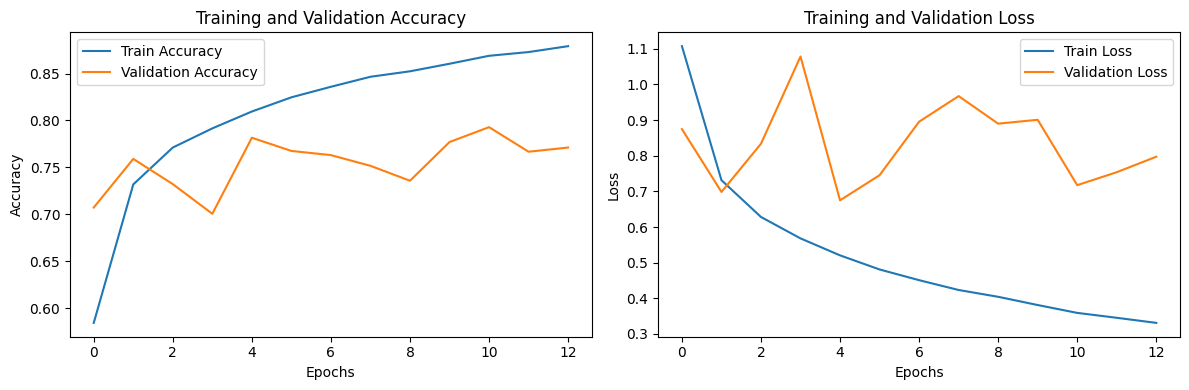

            Metric     Value
0         Accuracy  0.771170
1        Precision  0.732704
2           Recall  0.727810
3         F1 Score  0.716869
4          AUC-ROC  0.965473
5  Model Size (MB)  0.923130


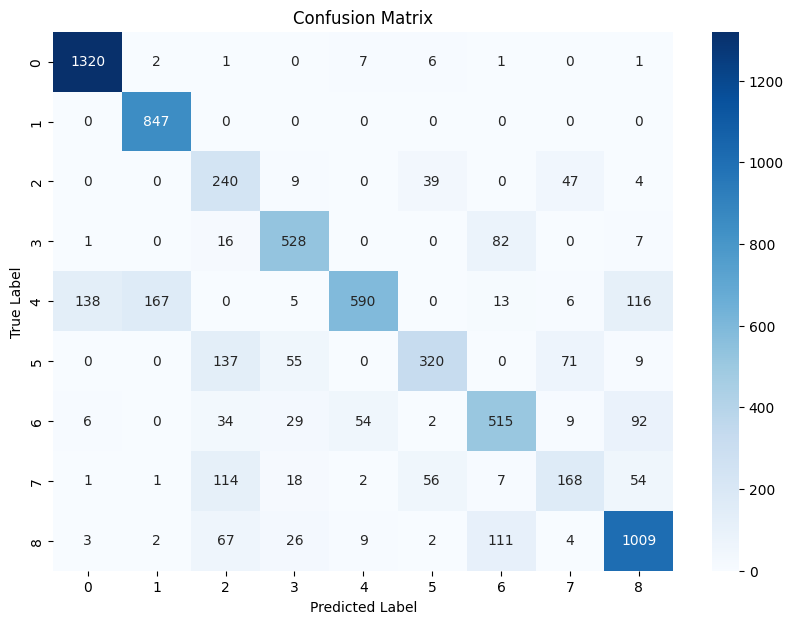

AttributeError: The layer sequential_17 has never been called and thus has no defined output.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from medmnist import PathMNIST, INFO
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import pandas as pd
import shap
import tensorflow as tf

# Load PathMNIST dataset
data_flag = "pathmnist"
info = INFO[data_flag]
DataClass = getattr(medmnist, info["python_class"])

# Download dataset
train_dataset = DataClass(split="train", download=True)
test_dataset = DataClass(split="test", download=True)

# Get data and labels
x_train, y_train = train_dataset.imgs, train_dataset.labels
x_test, y_test = test_dataset.imgs, test_dataset.labels

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train.flatten(), num_classes)
y_test = keras.utils.to_categorical(y_test.flatten(), num_classes)

# Reshape images for TensorFlow
x_train = x_train.reshape(-1, 28, 28, 3)
x_test = x_test.reshape(-1, 28, 28, 3)

# Create a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=13, validation_data=(x_test, y_test), batch_size=32)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Show model summary
model.summary()

# Calculate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Calculate AUC-ROC
y_pred_prob = model.predict(x_test)
auc_roc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Model size
model_size_mb = model.count_params() * 4 / (1024 * 1024)  # Assuming 4 bytes per parameter
print(f"Model Size: {model_size_mb:.4f} MB")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Create a results table
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'Model Size (MB)'],
    'Value': [test_acc, precision, recall, f1, auc_roc, model_size_mb]
})

print(results)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate Grad-CAM
def generate_grad_cam(model, image, class_index, layer_name=None):
    """
    Generate Grad-CAM heatmap.
    :param model: The trained model
    :param image: The image to explain
    :param class_index: The predicted class index
    :param layer_name: The layer name to use for Grad-CAM (usually the last convolutional layer)
    :return: Heatmap of the Grad-CAM result
    """
    # If no layer name is provided, use the last convolutional layer
    if layer_name is None:
        layer_name = [layer.name for layer in model.layers if 'conv' in layer.name][-1]
    
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs], 
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        inputs = tf.convert_to_tensor(image.reshape(1, 28, 28, 3))
        tape.watch(inputs)
        conv_outputs, predictions = grad_model(inputs)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply the feature maps by the pooled gradients
    conv_outputs = conv_outputs[0]
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Create the heatmap
    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

# Select an image from the test set to visualize
test_image = x_test[0]  # First image in the test set
pred_class_index = np.argmax(y_pred[0])  # Predicted class index for the selected image

# Generate Grad-CAM heatmap
grad_cam_heatmap = generate_grad_cam(model, test_image, pred_class_index)

# Plot the image and the heatmap
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title(f"Original Image (Predicted: {pred_class_index})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(test_image)
plt.imshow(grad_cam_heatmap, cmap='jet', alpha=0.6)  # Overlay heatmap on image
plt.title('Grad-CAM Heatmap')
plt.axis('off')

plt.tight_layout()
plt.show()

# Explain the model using SHAP
explainer = shap.KernelExplainer(model.predict, x_train[:100])  # Use a subset of x_train for the background
shap_values = explainer.shap_values(x_test[:10])  # Explain first 10 test images

# Plot SHAP values for the first image
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], x_test[0])
